# Stair-case study analyzer

__input__ = arrays of study data 

__output__=  PSEs and analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import wilcoxon

%matplotlib inline

In [107]:
data = [ # DUMMY DATA
    [3,2.75,2.5,2.25,2,1.75,2,2.25,2],
    [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,-0.25,0,-0.25,],
    [2,1.75,1.5,1.25,1,0.75,1,0.75,], #after change
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
#     [8,7,6,5,4,3,2,3,4,5,4,3,2,1,2,3,2,1,2,3],
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
#     [9,8,7,6,5,6,7,6,5,4,5,6,7,8,7,6,5,4,5,6,5,5],
#     [9,8,7,7,6,5,4,5,6,7,6,5,4,5,6,7,8,7,6,5,4,3,4,5,6,7,6],
]

data_pref =[
#     [2,1.75,1.5,1.25,1,0.75,1,0.75,], #abdullah
#     [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,-0.25,-0.5,-0.75,-1], #Paul
#     [2,1.75,1.5,1.25,1,1.25,1,], #marten
#     [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,-0.25,0,0.25,0.5,0.25,], #chiara
    [0,0.25,0.5,0.75,0.5,0.75], # Robert
    [0,0.25,0.5,0.75,1,1.25,1.5,1.25,1.5,], # Max
]
data_pref_2 = [
#     [2,1.75,1.5,1.25,1,0.75,1,0.75], #abdullah
#     [2,2.25,2.5,2.75,3,], #Paul
#     [2,1.75,2,2.25,2.5,2.75,], # marten
#     [2,2.25,2,1.75,1.5,1.25,1,0.75]
]
participants=["Robert Kosmehl", "Max Litze"]

feedback = [
    "liked glass because felt open, but felt like confined when glass cabin was smaller, at that time i liked wood cabin.",
    "in the first i didn’t like the glass too close, but wood cabin was claustrophobic,. In the end, overall, glass was more spacious."
]


feedback_old=[
    "",
    "I liked throwing task all the way. \n I didn't like the arm-space task because i felt like 'I had to go'. ",
    "I liked the throwing bottles, I had the most fun figuring out which throw movements would lead to which trajectory. \n Didn't like arm-space. I did not like how far I had to reach \n the edges of the counter. It felt nicer and more in flow to reach the inner containers. Also I could do this much faster which was a nice chellange",
    "I liked throwing bottles than putting bottoles on the box inside the counter (yes) because it feels like I am doing sports. It was a good challenge, not too hard, but also not too easy. I do not liked it when the box inside got too small. Then I felt like I could not move any more and so it also doesn’t feel like doing sports anymore.\n I liked putting bottles on the edge of counter than putting bottoles on the box inside (yes / no, because: I liked it, while the box was larger. Then I needed to move. It was boring, while the box was smaller and I did not even needed to take a step on the right direction."
]

data_2 = [ # DUMMY DATA
    [3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,1.25,1,0.75,1],
    [2,1.75,1.5,1.25,1,0.75,0.5,0.25,0,0.25,0,],
    [2,1.75,1.5,1.25,1,0.75,1,0.75,0.5], #after change
    [2,2.25,2.5,2.75,3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,] #Paul
#     [7,6,5,4,3,4,5,4,3,4,5,4,3,4,3,4],
#     [8,7,6,5,4,3,2,3,4,5,4,3,2,1,0,1,2,1,2,3],
#     [9,8,7,6,5,4,3,4,5,4,3,2,3,4,5,6,5,4,3,2,3,4],
#     [1,2,3,4,5,4,3,2,3,4,3,2,1,2,3,4,3,4,3,2,3,4],
#     [5,4,3,4,3,2,1,2,3,4,3,2,3],
#     [7,6,5,4,3,4,5,4,3,4,5,4,3,4,3,4],
#     [8,7,6,5,4,3,2,3,4,5,4,3,2,1,0,1,2,1,2,3],
#     [9,8,7,6,5,4,3,4,5,4,3,2,3,4,5,6,5,4,3,2,3,4],
#     [1,2,3,4,5,4,3,2,3,4,3,2,1,2,3,4,3,4,3,2,3,4],
]


## Utilities

In [108]:
def convertScaleToArea(s):
    s = np.array(s)
    w = (0.5*s+1.5)
    h = w*2/3.0
    return w*h

def getLastNReversals(arr, n=3):
    prev_a = 0
    down = False
    ret = []
    for idx, a in enumerate(arr):
        if idx==0:
            prev_a = a
            continue
        elif idx==1:
            if prev_a > a: down = True
            else:          down = False
            prev_a = a
            continue
        else:
            if (down == True) and (prev_a < a):
                down = False
                ret.append(prev_a)
            elif (down == False) and (prev_a > a):
                down = True
                ret.append(prev_a)
        if len(ret) >= n:
            return ret
        prev_a = a
    return ret

In [109]:
def getPSEs(data, n=3):
    ret = []
    for d in data:
        revs = getLastNReversals(d, n)
#         print(revs)
        if len(revs) != 0:
            ret.append(sum(revs) / len(revs))
    return ret
def getPSE(data, n=3):
    revs= getLastNReversals(data, n)
    if len(revs) != 0:
        return sum(revs) / len(revs)
    else: return data[-1]

In [123]:
def plotStaircase(arr, title ="", feedback=""):
    x = range(1, len(arr)+1)
    y = convertScaleToArea(arr)
    fig, ax = plt.subplots()
    g = sns.lineplot(x=x, y=y, marker="o")
    g.axhline(getPSE(y, 3))
    g.axhline(getPSE(convertScaleToArea([0])), color='red', linestyle="--", label='area of walkable space interaction')
    plt.ylim(0.0,4.0)
    plt.xlim(0.0,10.0)
    plt.xlabel("Trials",size=15)
    plt.ylabel("Space [sqm]",size=15)
    
    plt.title(title)
    plt.show()
    
def plotStaircasePerParticipant(arr1, arr2, title="", feedback=""):
#     x = range(1, len(arr)+1)
#     y = arr
    fig, ax = plt.subplots()
    g = sns.lineplot(x=range(1, len(arr1)+1), y=convertScaleToArea(arr1), marker="o", label="off v.s. walkable")
    g = sns.lineplot(x=range(1, len(arr2)+1), y=convertScaleToArea(arr2), marker="o", label="arm v.s. walkable", linestyle="--")
    g.axhline(getPSE(convertScaleToArea(arr1), 2))
    g.axhline(getPSE(convertScaleToArea(arr2), 2), color='orange')
    
    g.axhline(getPSE(convertScaleToArea([1.5])), color='red', linestyle="--", label='area of walkable space interaction')
    plt.legend()
    plt.title(title, size =15)
    plt.xlabel("Trials", size = 15)
    plt.ylabel("Area of off-space interaction", size = 15)
    plt.ylim(0.0,7.0)
    plt.axis([0, 10, 0, 10])
#     plt.text(10,6,feedback, fontsize = 12, ha='left', wrap=True)
    plt.show()
    print(feedback)
    
# for i in range(0,len(data_pref)):
#     title = "P"+str(i)
#     plotStaircasePerParticipant(data_pref[i],data_pref_2[i], title, feedback[i])
    
# plotStaircase(data_2[1])

## stat-test

### Wilcoxon test (non-parametric test)

In [124]:
title = wilcoxon(getPSEs(data_pref,2), getPSEs(data_pref_2,2))

ValueError: The samples x and y must have the same length.

<AxesSubplot:title={'center':'P0'}>

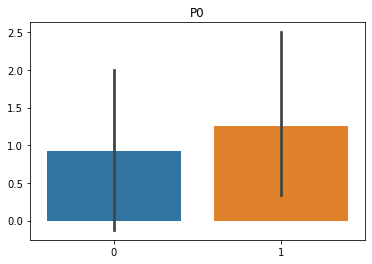

In [125]:
plt.title(title)
sns.barplot(data=[getPSEs(data,5), getPSEs(data_2,5)])

<AxesSubplot:title={'center':'P0'}>

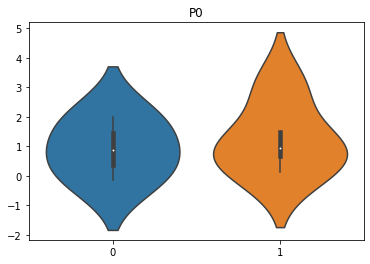

In [126]:
plt.title(title)
sns.violinplot(data=[getPSEs(data,5), getPSEs(data_2,5)])

# feedback

- generally 
- asking preferences : too large scope (fun / fatigue), arm-space probably affected by fatigue, which is problematic.
- asking spaciousness : (look for RW) give 2 sentences clear 
- asking more enjoyable?
- 


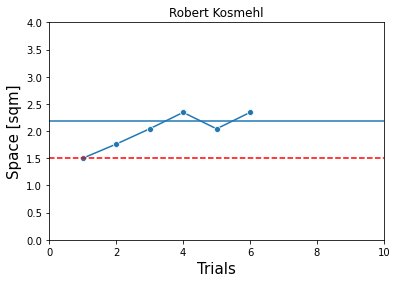

<Figure size 432x288 with 0 Axes>

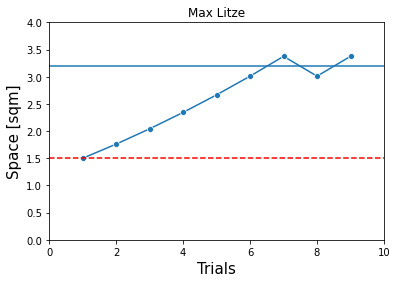

<Figure size 432x288 with 0 Axes>

In [128]:
for i, d in enumerate(data_pref):
    plotStaircase(d,participants[i],feedback[i])
    plt.savefig("glass-solid-"+str(i)+".eps")

# plotStaircase(data_pref[0])
# plotStaircase(data_pref[1])